In [1]:
using LaTeXStrings
using IntervalArithmetic
# using IntervalSets
using Plots
# plotly()
ENV["GKS_ENCODING"] = "utf8"
gr(fontfamily="IPAMincho")

include("./libs/display-latex.jl")
include("./libs/crisp-pcm.jl")
include("./libs/solve-deterministic-ahp.jl")
include("./libs/AMR-W-display.jl")
include("./libs/AMR-kai-display.jl")
include("./libs/AMR-display.jl")

AMR (generic function with 1 method)

In [2]:
# N=4
# T = [0.32..0.38,0.21..0.35,0.15..0.29,0.12..0.18]
# A = [
#     1.000000 1.000000 2.000000 2.000000
#     1.000000 1.000000 1.000000 2.000000
#     0.500000 1.000000 1.000000 2.000000
#     0.500000 0.500000 0.500000 1.000000
# ]


# N = 5 D
# T = [0.25..0.35,0.2..0.3,0.15..0.25,0.1..0.2,0.05..0.15]
# A = [
#     1.000000 1.000000 2.000000 2.000000 5.000000
#     1.000000 1.000000 1.000000 2.000000 2.000000
#     0.500000 1.000000 1.000000 2.000000 4.000000
#     0.500000 0.500000 0.500000 1.000000 3.000000
#     0.200000 0.500000 0.250000 0.333333 1.000000
# ]


# N=6 A
T = [0.21..0.25,0.17..0.23,0.14..0.22,0.1..0.2,0.07..0.19,0.04..0.18]
A = [
    1.000000 1.000000 1.000000 1.000000 3.000000 3.000000
    1.000000 1.000000 1.000000 1.000000 3.000000 4.000000
    1.000000 1.000000 1.000000 2.000000 1.000000 4.000000
    1.000000 1.000000 0.500000 1.000000 2.000000 2.000000
    0.333333 0.333333 1.000000 0.500000 1.000000 1.000000
    0.333333 0.250000 0.250000 0.500000 1.000000 1.000000
]


# N=7 B
# T = [0.115..0.245,0.11..0.23,0.105..0.215,0.09..0.19,0.085..0.175,0.08..0.16,0.065..0.135]
# A = [
#     1.000000 0.500000 0.500000 1.000000 1.000000 2.000000 1.000000
#     2.000000 1.000000 2.000000 1.000000 1.000000 3.000000 2.000000
#     2.000000 0.500000 1.000000 1.000000 0.500000 0.500000 2.000000
#     1.000000 1.000000 1.000000 1.000000 2.000000 0.500000 1.000000
#     1.000000 1.000000 2.000000 0.500000 1.000000 1.000000 2.000000
#     0.500000 0.333333 2.000000 2.000000 1.000000 1.000000 1.000000
#     1.000000 0.500000 0.500000 1.000000 0.500000 1.000000 1.000000
# ]

# N=8 C
# T = [0.1..0.22,0.1..0.2,0.1..0.18,0.1..0.16,0.09..0.15,0.07..0.15,0.05..0.15,0.03..0.15]
# A = [
#     1.000000 1.000000 2.000000 2.000000 1.000000 1.000000 2.000000 1.000000
#     1.000000 1.000000 1.000000 1.000000 2.000000 1.000000 1.000000 5.000000
#     0.500000 1.000000 1.000000 0.500000 1.000000 1.000000 2.000000 3.000000
#     0.500000 1.000000 2.000000 1.000000 1.000000 1.000000 1.000000 1.000000
#     1.000000 0.500000 1.000000 1.000000 1.000000 2.000000 3.000000 1.000000
#     1.000000 1.000000 1.000000 1.000000 0.500000 1.000000 3.000000 1.000000
#     0.500000 1.000000 0.500000 1.000000 0.333333 0.333333 1.000000 2.000000
#     1.000000 0.200000 0.333333 1.000000 1.000000 1.000000 0.500000 1.000000
# ]

display(L"T = %$(intervalVectorLaTeXString(T))")
display(L"A = %$(matrixLaTeXString(A))")
m, n = size(A)

L"$T = \begin{pmatrix} \left[ 0.21, 0.25 \right] \\ \left[ 0.17, 0.23 \right] \\ \left[ 0.14, 0.22 \right] \\ \left[ 0.1, 0.2 \right] \\ \left[ 0.07, 0.19 \right] \\ \left[ 0.04, 0.18 \right] \end{pmatrix}$"

L"$A = \begin{pmatrix} 1.0 & 1.0 & 1.0 & 1.0 & 3.0 & 3.0 \\1.0 & 1.0 & 1.0 & 1.0 & 3.0 & 4.0 \\1.0 & 1.0 & 1.0 & 2.0 & 1.0 & 4.0 \\1.0 & 1.0 & 0.5 & 1.0 & 2.0 & 2.0 \\0.333 & 0.333 & 1.0 & 0.5 & 1.0 & 1.0 \\0.333 & 0.25 & 0.25 & 0.5 & 1.0 & 1.0 \\ \end{pmatrix}$"

(6, 6)

L"$E-AMR_W = \begin{pmatrix} \left[ 0.21, 0.219 \right] \\ \left[ 0.203, 0.248 \right] \\ \left[ 0.138, 0.303 \right] \\ \left[ 0.129, 0.21 \right] \\ \left[ 0.061, 0.138 \right] \\ \left[ 0.062, 0.078 \right] \end{pmatrix}$"

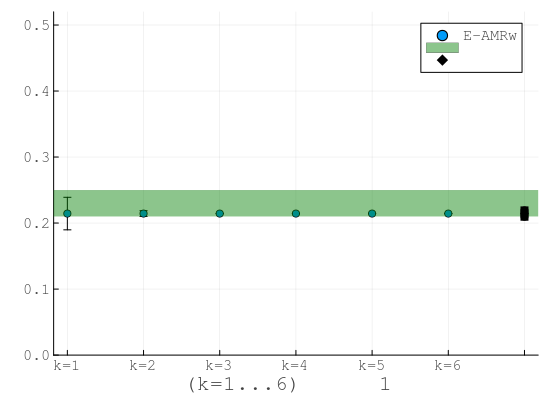

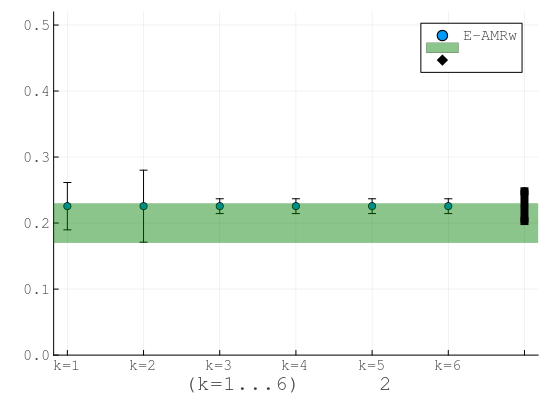

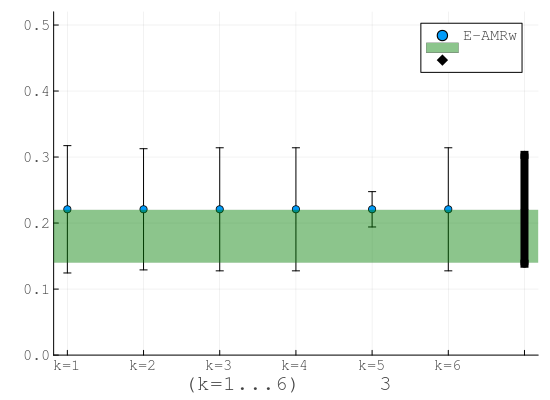

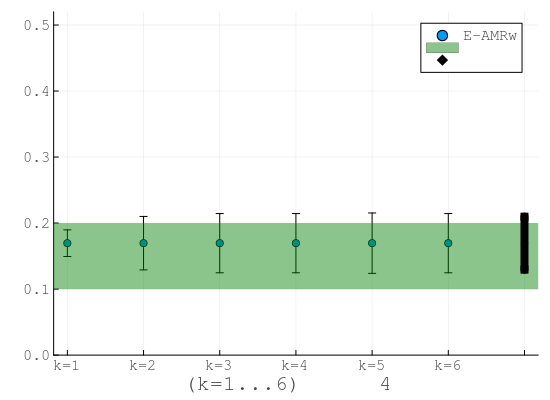

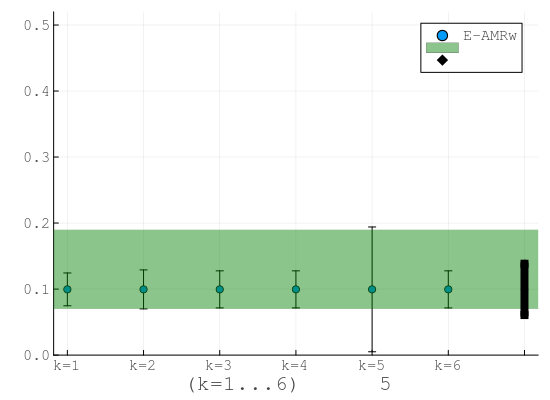

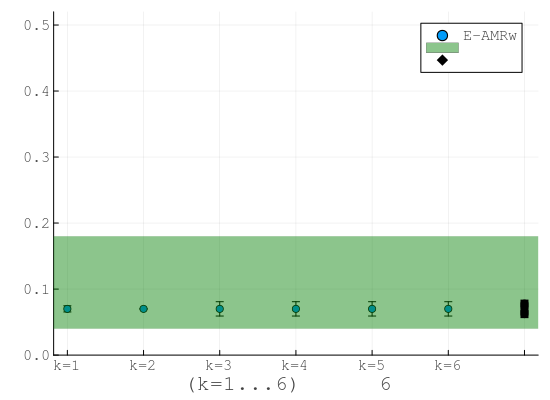

GKS: could not find font IPAMincho.ttf
GKS: glyph missing from current font: 32113
GKS: glyph missing from current font: 21512
GKS: invalid bitmap size
GKS: glyph missing from current font: 24369
GKS: glyph missing from current font: 12514
GKS: glyph missing from current font: 12487
GKS: glyph missing from current font: 12523
GKS: glyph missing from current font: 12395
GKS: glyph missing from current font: 12424
GKS: glyph missing from current font: 12427
GKS: glyph missing from current font: 37325
GKS: glyph missing from current font: 35201
GKS: glyph missing from current font: 24230
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25512
GKS: glyph missing from current font: 23450
GKS: glyph missing from current font: 32080
GKS: glyph missing from current font: 26524
GKS: glyph missing from current font: 24369
GKS: glyph missing from current font: 12514
GKS: glyph missing from current font: 12487
GKS: glyph missing from current font: 12523
GKS: glyph m

In [3]:
# 従来法E-AMR-W
solution_AMRW = AMR_W(A, EV)
W_AMRW = solution_AMRW.W
centers_AMRW = solution_AMRW.centers
l_AMRW = solution_AMRW.l
display(L"E-AMR_W = %$(intervalVectorLaTeXString(W_AMRW))")

categories = ["k="*string(i) for i in 1:n]
result_center = [(inf(W_AMRW[i])+sup(W_AMRW[i]))/2 for i in 1:n]
result_error = [diam(W_AMRW[i])/2 for i in 1:n]

for i in 1:n
    plot_obj = plot()
    x = 1:n
    y = fill(centers_AMRW[i], n)
    e = l_AMRW[i, :]
    plot!(categories, y, grid=true, yerror=e, st=:scatter, label = "E-AMRw ", markershape = :circle, ylims=(0, 0.52), size=(550, 400))    
    hspan!([inf(T[i]), sup(T[i])], color=:green, alpha=0.45, label="真の区間")
    plot!(["統合"], [result_center[i]], grid=true, yerror=result_error[i], st=:scatter, label = "統合結果", markershape = :diamond, linewidth=8, markercolor=:black)
    plot!(ylabel="区間重要度", xlabel="弱モデル(k=1...$(n))による重要度$(i)の推定結果")
    display(plot_obj)
    savefig(plot_obj, "./out/$(n)-E-MMRw-$(i).svg")
end

L"$eAMR_W = \begin{pmatrix} \left[ 0.19, 0.25 \right] \\ \left[ 0.191, 0.27 \right] \\ \left[ 0.128, 0.261 \right] \\ \left[ 0.122, 0.217 \right] \\ \left[ 0.066, 0.137 \right] \\ \left[ 0.058, 0.11 \right] \end{pmatrix}$"

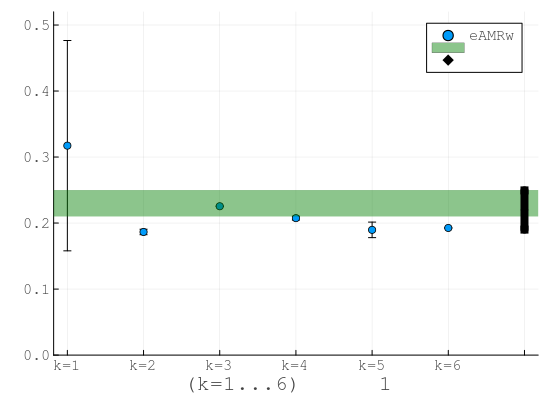

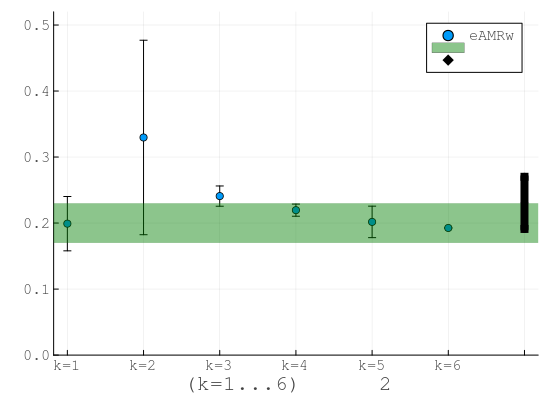

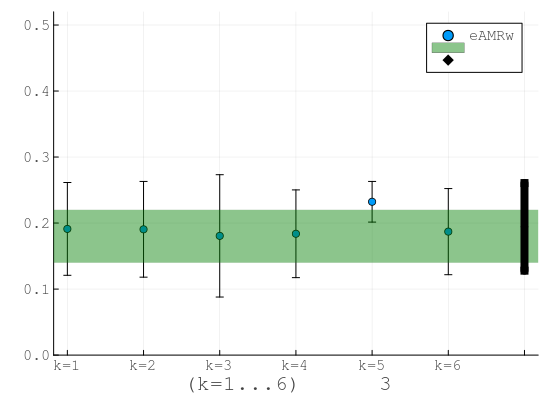

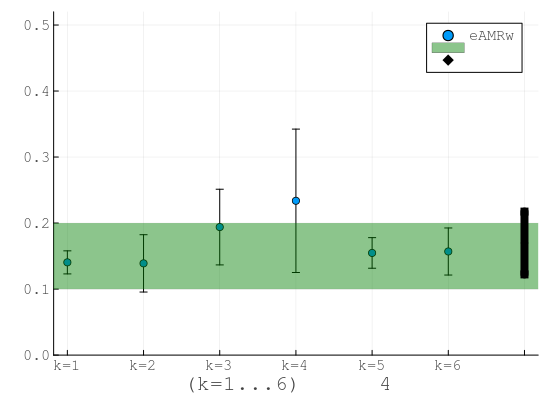

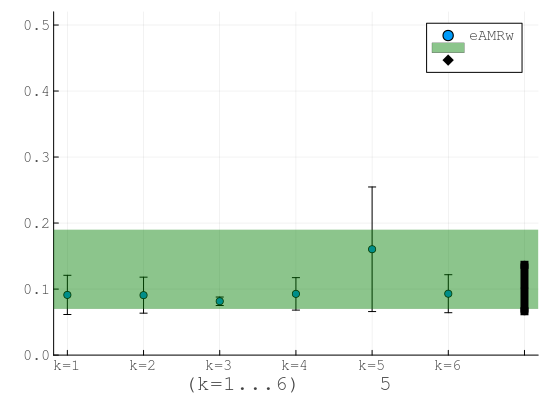

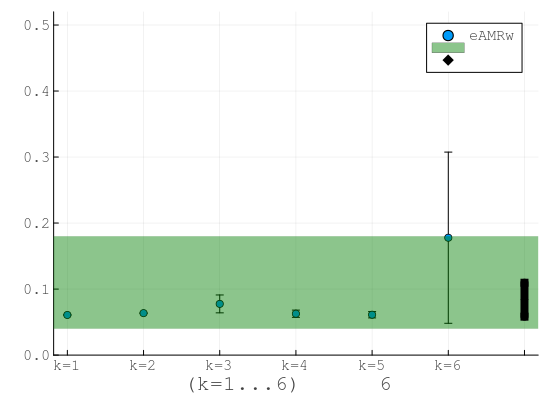

GKS: glyph missing from current font: 32113
GKS: glyph missing from current font: 21512
GKS: invalid bitmap size
GKS: glyph missing from current font: 24369
GKS: glyph missing from current font: 12514
GKS: glyph missing from current font: 12487
GKS: glyph missing from current font: 12523
GKS: glyph missing from current font: 12395
GKS: glyph missing from current font: 12424
GKS: glyph missing from current font: 12427
GKS: glyph missing from current font: 37325
GKS: glyph missing from current font: 35201
GKS: glyph missing from current font: 24230
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25512
GKS: glyph missing from current font: 23450
GKS: glyph missing from current font: 32080
GKS: glyph missing from current font: 26524
GKS: glyph missing from current font: 24369
GKS: glyph missing from current font: 12514
GKS: glyph missing from current font: 12487
GKS: glyph missing from current font: 12523
GKS: glyph missing from current font: 12395
GKS: gl

In [4]:
# 提案法 eAMR-W
solution_AMR = AMR(A, EV)
W_AMR = solution_AMR.W
s_AMR = solution_AMR.s
centers_AMR = solution_AMR.centers
l_AMR = solution_AMR.l
display(L"eAMR_W = %$(intervalVectorLaTeXString(W_AMR))")

categories = ["k="*string(i) for i in 1:n]
result_center = [(inf(W_AMR[i])+sup(W_AMR[i]))/2 for i in 1:n]
result_error = [diam(W_AMR[i])/2 for i in 1:n]

for i in 1:n
    plot_obj = plot()
    x = 1:n
    y = centers_AMR[i, :]
    e = l_AMR[i, :]
    plot!(categories, y, grid=true, yerror=e, st=:scatter, label = "eAMRw ", markershape = :circle, ylims=(0, 0.52), size=(550, 400))
    # plot!(title="Importance at Index $(i)")

    hspan!([inf(T[i]), sup(T[i])], color=:green, alpha=0.45, label="真の区間")
    plot!(["統合"], [result_center[i]], grid=true, yerror=result_error[i], st=:scatter, label = "統合結果", markershape = :diamond, linewidth=8, markercolor=:black)
    plot!(ylabel="区間重要度", xlabel="弱モデル(k=1...$(n))による重要度$(i)の推定結果")
    display(plot_obj)
    savefig(plot_obj, "./out/$(n)-eMMRw-$(i).svg")
end

L"$eAMR_{W/C} = \begin{pmatrix} \left[ 0.206, 0.217 \right] \\ \left[ 0.207, 0.253 \right] \\ \left[ 0.144, 0.279 \right] \\ \left[ 0.133, 0.212 \right] \\ \left[ 0.067, 0.144 \right] \\ \left[ 0.063, 0.075 \right] \end{pmatrix}$"

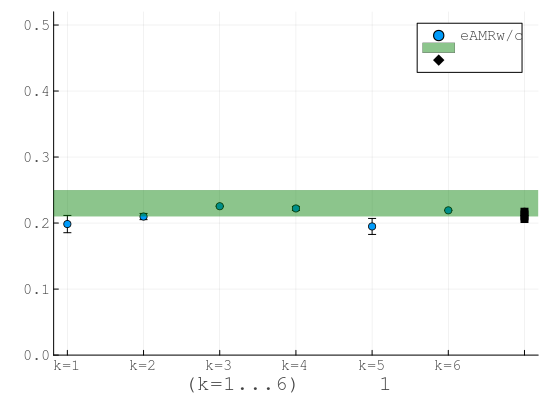

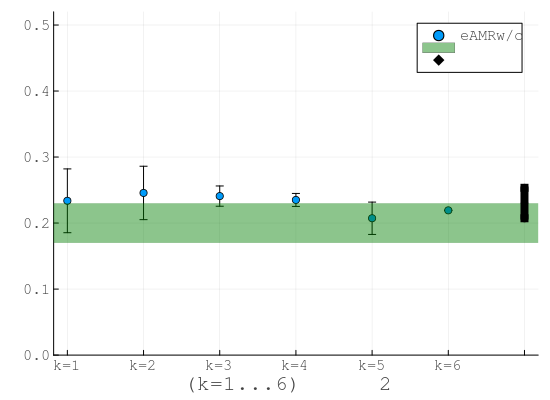

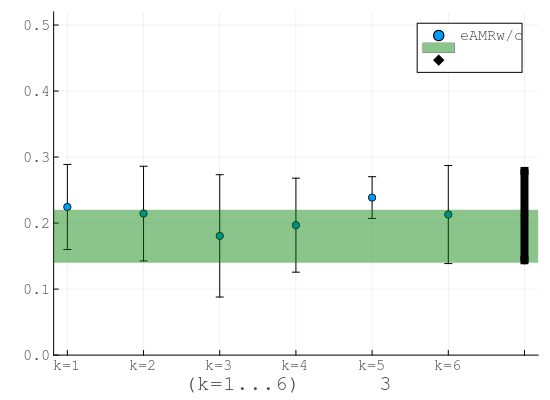

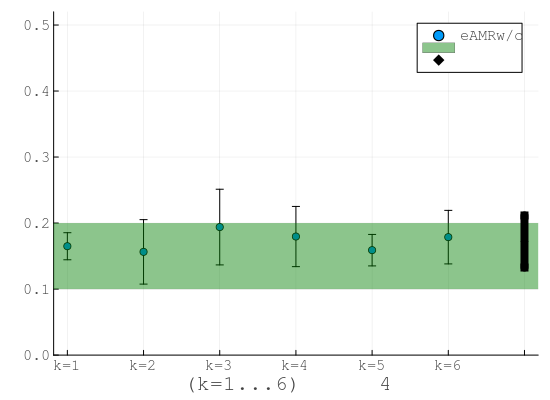

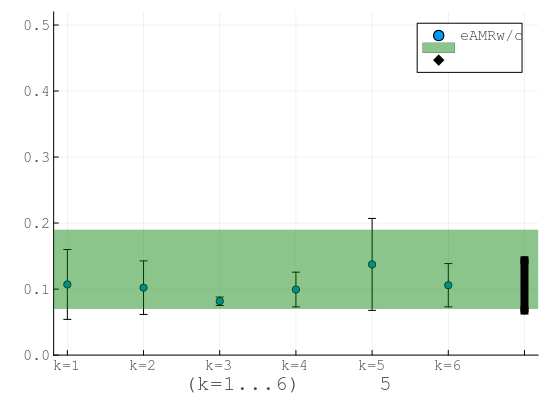

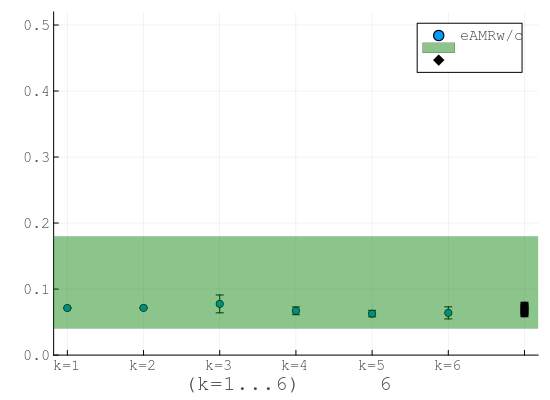

GKS: glyph missing from current font: 32113
GKS: glyph missing from current font: 21512
GKS: invalid bitmap size
GKS: glyph missing from current font: 24369
GKS: glyph missing from current font: 12514
GKS: glyph missing from current font: 12487
GKS: glyph missing from current font: 12523
GKS: glyph missing from current font: 12395
GKS: glyph missing from current font: 12424
GKS: glyph missing from current font: 12427
GKS: glyph missing from current font: 37325
GKS: glyph missing from current font: 35201
GKS: glyph missing from current font: 24230
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25512
GKS: glyph missing from current font: 23450
GKS: glyph missing from current font: 32080
GKS: glyph missing from current font: 26524
GKS: glyph missing from current font: 24369
GKS: glyph missing from current font: 12514
GKS: glyph missing from current font: 12487
GKS: glyph missing from current font: 12523
GKS: glyph missing from current font: 12395
GKS: gl

In [5]:
# 提案法 eAMR-W/C
solution_AMRkai = AMR_kai(A, EV)
s_AMRkai = solution_AMRkai.s
centers_AMRkai = solution_AMRkai.centers
l_AMRkai = solution_AMRkai.l
W_AMRkai = solution_AMRkai.W
display(L"eAMR_{W/C} = %$(intervalVectorLaTeXString(W_AMRkai))")

categories = ["k="*string(i) for i in 1:n]
result_center = [(inf(W_AMRkai[i])+sup(W_AMRkai[i]))/2 for i in 1:n]
result_error = [diam(W_AMRkai[i])/2 for i in 1:n]

for i in 1:n
    plot_obj = plot()
    x = 1:n
    y = centers_AMRkai[i, :]
    e = l_AMRkai[i, :]
    plot!(categories, y, grid=true, yerror=e, st=:scatter, label = "eAMRw/c", markershape = :circle, ylims=(0, 0.52), size=(550, 400))
    
    hspan!([inf(T[i]), sup(T[i])], color=:green, alpha=0.45, label="真の区間")
    plot!(["統合"], [result_center[i]], grid=true, yerror=result_error[i], st=:scatter, label = "統合結果", markershape = :diamond, linewidth=8, markercolor=:black)
    plot!(ylabel="区間重要度", xlabel="弱モデル(k=1...$(n))による重要度$(i)の推定結果")
    display(plot_obj)
    savefig(plot_obj, "./out/$(n)-eMMRwc-$(i).svg")
end